# Hierachical Clustering 

In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
from plotnine import *

from sklearn.preprocessing import StandardScaler

from sklearn.cluster import AgglomerativeClustering


from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture

from sklearn.metrics import silhouette_score

import scipy.cluster.hierarchy as sch

from matplotlib import pyplot as plt

%matplotlib inline

## Import Dataset

In [26]:
# Students performance in five test throught the semester
url='https://raw.githubusercontent.com/kulkarni62sushil/Data/main/testperform_long.csv'
tests = pd.read_csv(url)
tests.head()

,id,name,value,test
0,1,zero,64.270000,0
1,1,one,65.950884,1
2,1,two,69.865513,2
3,1,three,70.071844,3
4,1,four,71.557456,4


## Draw Graph

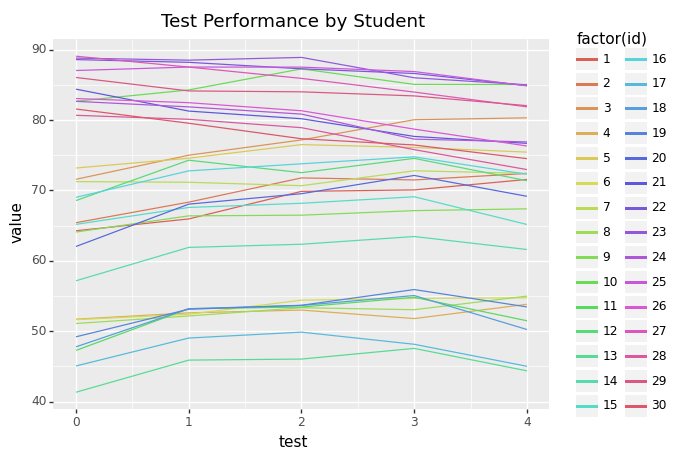

<ggplot: (8767534650260)>

In [23]:
(ggplot(tests, aes("test", "value", color = "factor(id)")) + geom_line() +
  ggtitle("Test Performance by Student"))

We cluster the students based on their performence from these 5 tests

In [24]:
# Load the same data in different format
# wide data
url1='https://raw.githubusercontent.com/kulkarni62sushil/Data/main/testperform.csv'

tests_wide = pd.read_csv(url1)

tests_wide.head()

,zero,one,two,three,four,id
0,64.27,65.950884,69.865513,70.071844,71.557456,1
1,65.42,68.334638,71.774954,71.488519,72.414197,2
2,71.58,75.002741,77.169056,80.038548,80.307990,3
3,51.71,52.610899,53.005482,51.800135,53.829034,4
4,73.18,74.575287,76.507547,76.102415,75.441424,5


This gives students on each row and tests on columns 

**NOTE: Data is in a scale of 0 to 100 so no need to do scaling**

In [30]:
features = ["zero", "one", "two", "three", "four"]

X = tests_wide[features]

hac = AgglomerativeClustering(n_clusters=2,
                              affinity = "euclidean",
                             linkage = "ward")

**NOTE:**

**`affinity` may be` manhatton` , `cosine` etc**

**linkage : {"ward", "complete", "average", "single"}, default="ward" .
The linkage criterion determines which distance to use between sets of observation. The algorithm will merge
the pairs of cluster that minimize this criterion.**

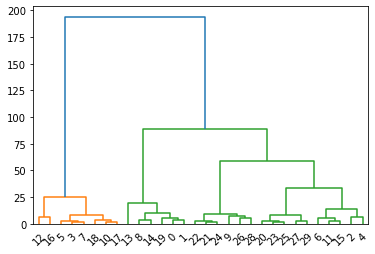

In [31]:
hac.fit(X)

dendro = sch.dendrogram(sch.linkage(X, method='ward',metric='euclidean'))

**It is very dense at the bottom and very narrow on the top** 

In [32]:
membership = hac.labels_
membership

array([0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0])

In [33]:
silhouette_score(X,membership)

0.6429365563401733

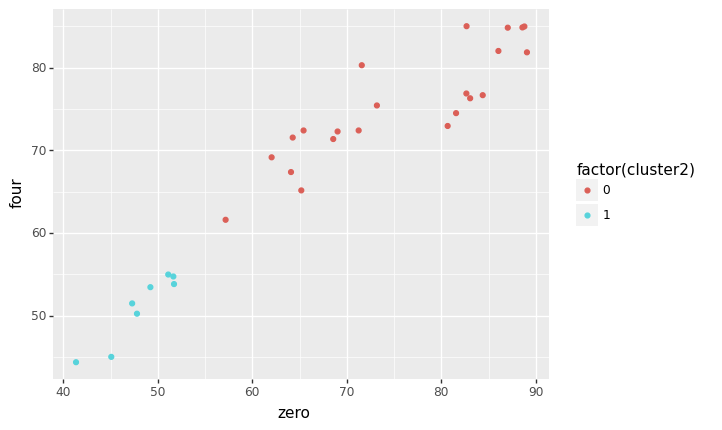

<ggplot: (8767532056080)>

In [42]:
tests_wide["cluster2"] = membership
(ggplot(tests_wide, aes(x = "zero" , y="four",color="factor(cluster2)"
                     ))+geom_point())

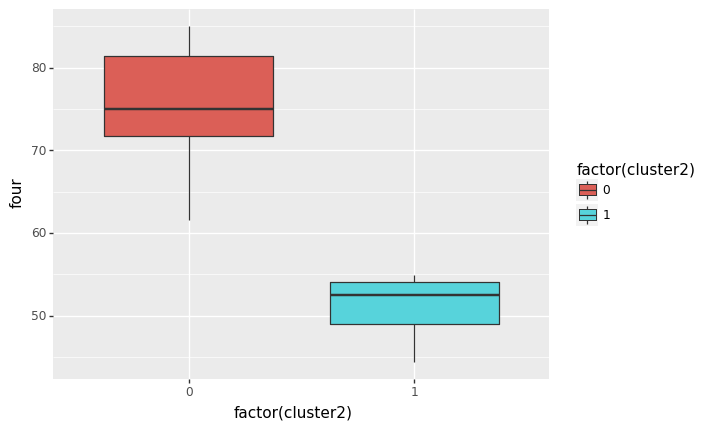

<ggplot: (8767534505786)>

In [35]:
tests_wide["cluster2"] = membership
(ggplot(tests_wide, aes(x = "factor(cluster2)", y = "four")) + geom_boxplot(aes(fill = "factor(cluster2)")))

In [43]:
hac = AgglomerativeClustering(n_clusters = 3,
                              affinity = "euclidean",
                             linkage = "ward")
hac.fit(X)



AgglomerativeClustering(n_clusters=3)

In [44]:
membership = hac.labels_
membership

array([2, 2, 0, 1, 0, 1, 0, 1, 2, 0, 1, 0, 1, 2, 2, 0, 1, 1, 1, 2, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0])

In [45]:
silhouette_score(X,membership)

0.5275892679012398

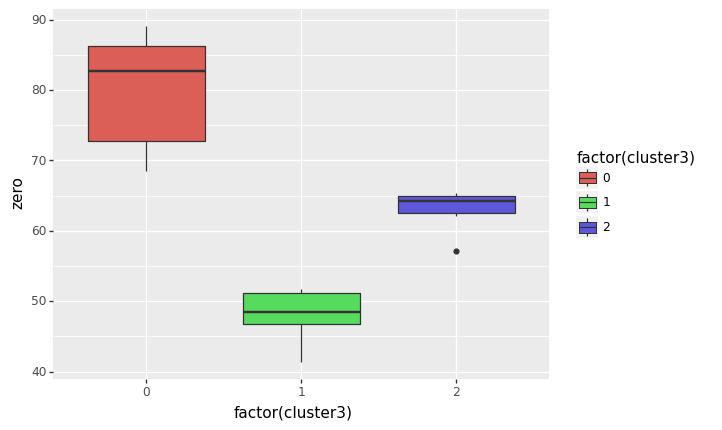

<ggplot: (8767532260810)>

In [10]:
tests_wide["cluster3"] = membership
(ggplot(tests_wide, aes(x = "factor(cluster3)", y = "zero")) + geom_boxplot(aes(fill = "factor(cluster3)")))

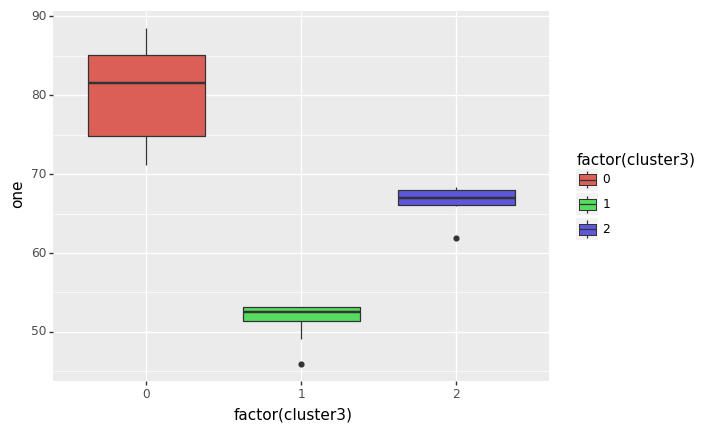

<ggplot: (8767532360461)>

In [11]:
(ggplot(tests_wide, aes(x = "factor(cluster3)", y = "one")) + geom_boxplot(aes(fill = "factor(cluster3)")))

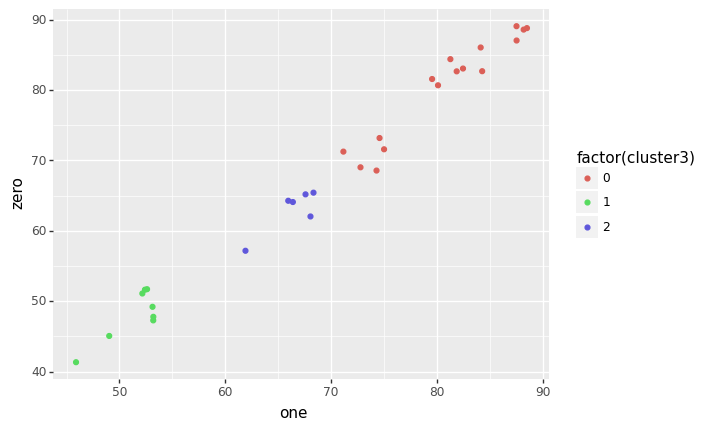

<ggplot: (8767532650222)>

In [12]:
(ggplot(tests_wide, aes(x = "one", y = "zero")) + geom_point(aes(color = "factor(cluster3)")))

# Another Example

In [46]:
url='https://raw.githubusercontent.com/kulkarni62sushil/Data/main/makeup.csv'
makeup=pd.read_csv(url)

In [47]:
makeup.head()

,eyeshaddow,lipstick,foundation
0,4,8,4
1,11,13,4
2,8,11,4
3,11,18,3
4,10,12,3


In [48]:
hac2 = AgglomerativeClustering(n_clusters = 3,
                               affinity = "cosine",
                              linkage = "average")

hac2.fit(makeup)

AgglomerativeClustering(affinity='cosine', linkage='average', n_clusters=3)

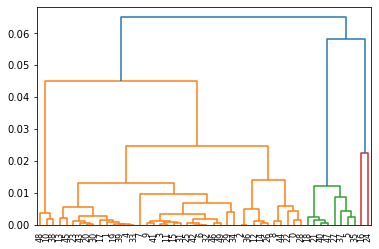

In [49]:
dendro = sch.dendrogram(sch.linkage(makeup, metric = "cosine", method='average'))

In [50]:
membership = hac2.labels_
membership

array([0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 2, 0, 0, 2,
       0, 0, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 0, 0])

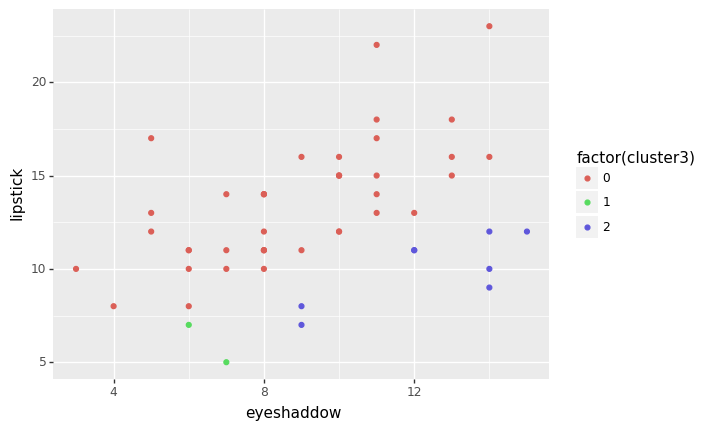

<ggplot: (8767535598912)>

In [51]:
makeup["cluster3"] = membership

(ggplot(makeup, aes(x = "eyeshaddow", y = "lipstick")) + geom_point(aes(color = "factor(cluster3)")))

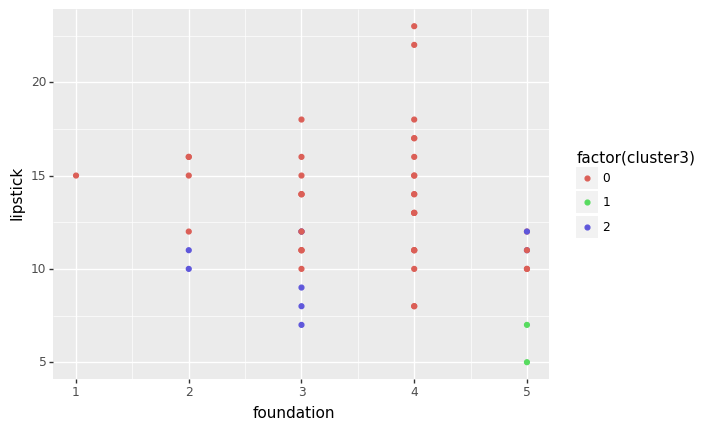

<ggplot: (8767536862287)>

In [52]:
(ggplot(makeup, aes(x = "foundation", y = "lipstick")) + geom_point(aes(color = "factor(cluster3)")))

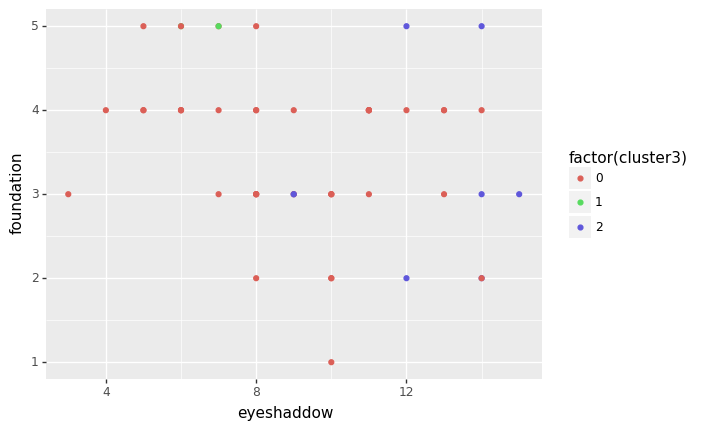

<ggplot: (8767536729676)>

In [53]:
(ggplot(makeup, aes(x = "eyeshaddow", y = "foundation")) + geom_point(aes(color = "factor(cluster3)")))